In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

In [2]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

Few notes:

* If we use `matmul`, we can perform multiplication between matrix and 1D tensor
* If using `mm`, we must use two matrices (i.e. convert $\mathbf w$ to a $D\times 1$ matrix)

In [80]:
class MyLinearRegression:
    def __init__(self, n_features):
        self.w = torch.zeros(n_features + 1, requires_grad=True)
    
    def forward(self, x):
        return x.matmul(self.w[1:]) + self.w[0]
    
    def parameters(self):
        return [self.w]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    return (pred - y).pow(2).mean()

numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype=np.float32)
model = MyLinearRegression(len(numpy_inputs))

torch_inputs = torch.from_numpy(numpy_inputs)
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

Testing model: an input of [0. 1. 2.] gives a prediction:
 tensor(0., grad_fn=<AddBackward0>)


In [81]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):
    
    x = torch.from_numpy(features)
    y = torch.from_numpy(labels)

    for epoch in range(num_epoch):
        # TODO: Step 2 - compute model predictions and loss
        # Forward propagation
        yhat = model(x)
        
        # Loss
        loss = lossfunc(yhat, y)
        
        # TODO: Step 3 - do a backward pass and a gradient update step
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis=0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 5.9467
Epoch [11/50], Loss: 5.9467
Epoch [21/50], Loss: 5.9467
Epoch [31/50], Loss: 5.9467
Epoch [41/50], Loss: 5.9467


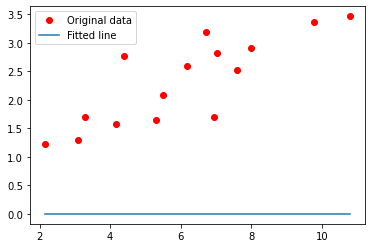

In [84]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
model = MyLinearRegression(x_train.shape[1])
train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

[Tutorial for custom nn modules](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-custom-nn-modules)

Epoch [1/100], Loss: 1.3963
Epoch [11/100], Loss: 0.3759
Epoch [21/100], Loss: 0.2084
Epoch [31/100], Loss: 0.1809
Epoch [41/100], Loss: 0.1763
Epoch [51/100], Loss: 0.1756
Epoch [61/100], Loss: 0.1754
Epoch [71/100], Loss: 0.1754
Epoch [81/100], Loss: 0.1753
Epoch [91/100], Loss: 0.1753


/home/maousi/anaconda3/envs/ml/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


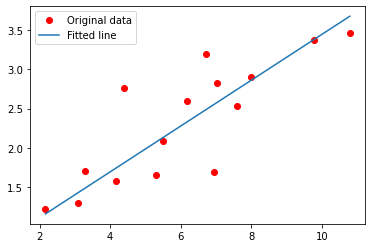

In [85]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        # TODO: implement forward computation
        return self.linear(x)
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = nn.MSELoss(size_average=True)

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=100)
visualize(x_train, y_train, model)

## MLP

In [87]:
import torch.nn.functional as F

Epoch [1/300], Loss: 7.3569
Epoch [11/300], Loss: 0.4464
Epoch [21/300], Loss: 0.4261
Epoch [31/300], Loss: 0.4128
Epoch [41/300], Loss: 0.4001
Epoch [51/300], Loss: 0.3869
Epoch [61/300], Loss: 0.3733
Epoch [71/300], Loss: 0.3593
Epoch [81/300], Loss: 0.3450
Epoch [91/300], Loss: 0.3307
Epoch [101/300], Loss: 0.3164
Epoch [111/300], Loss: 0.3024
Epoch [121/300], Loss: 0.2889
Epoch [131/300], Loss: 0.2759
Epoch [141/300], Loss: 0.2637
Epoch [151/300], Loss: 0.2524
Epoch [161/300], Loss: 0.2419
Epoch [171/300], Loss: 0.2325
Epoch [181/300], Loss: 0.2241
Epoch [191/300], Loss: 0.2166
Epoch [201/300], Loss: 0.2100
Epoch [211/300], Loss: 0.2043
Epoch [221/300], Loss: 0.1994
Epoch [231/300], Loss: 0.1952
Epoch [241/300], Loss: 0.1916
Epoch [251/300], Loss: 0.1886
Epoch [261/300], Loss: 0.1860
Epoch [271/300], Loss: 0.1838
Epoch [281/300], Loss: 0.1895
Epoch [291/300], Loss: 0.2426


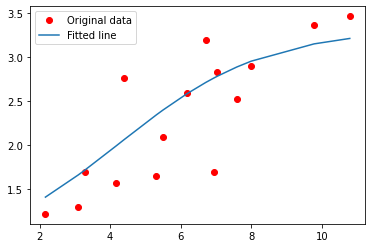

In [102]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h_hat = torch.sigmoid(self.hidden(x))
        yhat = self.linear(h_hat)
        return yhat
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 1
learning_rate = 1e-1

model = MLP(input_size=x_train.shape[1], hidden_size=hidden_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=300)
visualize(x_train, y_train, model)